MLP (Multi Layer Perceptron) : 가장 기본적인 딥러닝 모델의 구조

# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델) 구조를 정의**
    - Sequential 방식 : 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식 : 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식 : 네트워크를 정의하는 클래스를 구현
    

3. **모델 Compile(컴파일)** - 모델을 학습 가능한 상태로 만듬
    - 모델이 Train(학습) 시 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성

##### import

In [1]:
import numpy as np
import tensorflow as tf # 별칭 : tf
from tensorflow import keras

##### MNIST dataset Loading

In [2]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [3]:
print(train_image.shape, test_image.shape) # input data의 shape : (데이터 개수, 특성의 형태) -> (데이터개수, height, width)

(60000, 28, 28) (10000, 28, 28)


In [4]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


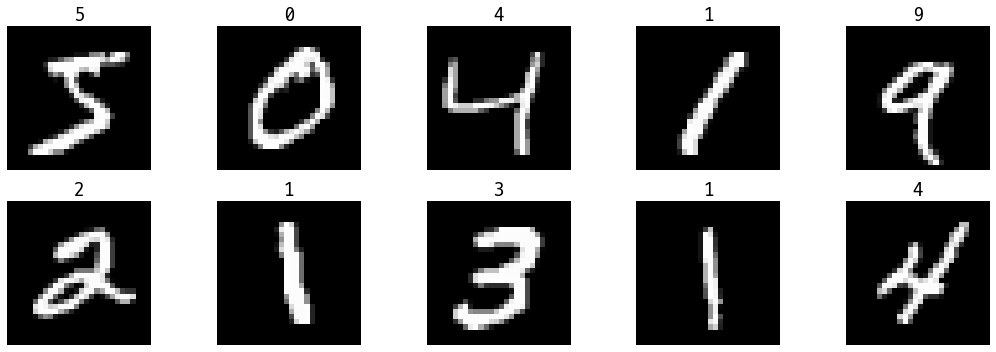

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# 10장의 이미지와 label 확인
N = 10
for i in range(N):
    plt.subplot(2, int(N/2), i+1)
    plt.imshow(train_image[i], cmap='gray') # train_image의 i번째 이미지를 출력 - grayscale의 경우 cmap을 gray로 지정
    plt.title(str(train_label[i]), fontsize=20) # subplot(axes) 제목을 label로 설정
    plt.axis('off') # 축은 그리지 않도록 설정
    
plt.tight_layout()
plt.show()    

## 네트워크(모델) 구현
- Network : 전체 모델 구조

In [6]:
# Sequential(순차) 방식으로 모델 생성
model = keras.Sequential()

# 모델에 layer들을 추가 - model.add(레이어 객체)
# Layer - 모델이 추론하는 각각의 단계을 의미 => Input(학습/추론 할 데이터를 넣는 단계), Hidden(추론과정 담당), Output(추론결과 출력) Layer로 구성
# 1. Input Layer 추가
model.add(keras.layers.InputLayer((28,28))) 

# 2. Hidden Layer들 추가
model.add(keras.layers.Flatten())  

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))

# 3. Output Layer 추가
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
# 모델 구조 확인(text 형식)
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


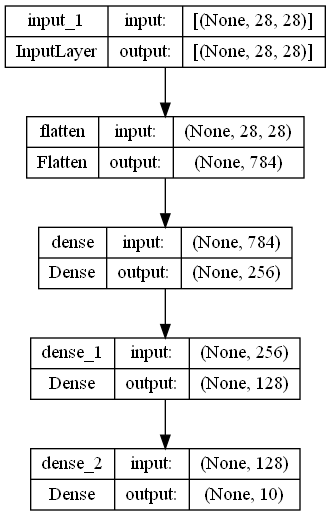

In [8]:
# 모델 구조 확인(graphviz를 통한 시각화)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True)

## 컴파일 단계
- 정의된 네트워크 모델에 학습을 위한 추가 설정
    - Optimizer
    - 손실함수
    - 평가지표

In [9]:
model.compile(optimizer='adam', # 최적화 함수 : Adam 함수
              loss='categorical_crossentropy', # cross entropy
              metrics=['accuracy']) # 추가 평가지표 - 정확도

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 (0 ~ 255 -> 0 ~ 1 : Feature Scaling)
- y (Output Data) : 0 ~ 9
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

In [10]:
print(np.min(train_image), np.max(train_image), train_image.dtype, sep=', ')
# uint8 : unsigned int - 8bit

0, 255, uint8


##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [11]:
X_train = train_image.astype(np.float32) # type 변환 : uint8 -> float32
X_train /= 255.0 # X_train = X_train/255.0 # X_train이 가지는 제일 큰 값(max)인 255로 나누에 0 ~ 1로 정규화

X_test = test_image.astype(np.float32)
X_test /= 255.0

In [12]:
print(np.min(X_train), np.max(X_test), X_train.dtype, sep=', ')

0.0, 1.0, float32


##### label(y)를 one hot encoding
- 모델이 각 클래스별 확률이 출력되도록 정의 되었기 때문에 학습 시 오차를 구하기 위해서는 정답이 Label이 아닌 확률이 되도록 y를 one hot encoding처리

In [13]:
print(train_label.shape, test_label.shape)
train_label[:5]

(60000,) (10000,)


array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [15]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


## 학습 (fit)
- model.fit()
    - 모델 학습 메소드
    - 학습과정의 Log를 History 객체로 반환
- History : train 시 에폭별 평가지표값들을 모아서    

예시)
- epoch: 10
- batch_size: 100
- train set : 60,000
- 1 epoch: 6만개 문제를 한번 다 풀어보는 것.
- 100문제(batch size) 풀고 정답확인하고 다음 100문제 풀고 정답 확인
- batch_size 단위로 학습 => 1 step 

In [17]:
hist = model.fit(X_train, y_train, # input(X_train), output(y_train)
                  epochs=10, # 전체 train dataset을 몇번 반복하여 학습시킬지 정의 1번 학습 => 1 epoch
                  batch_size=100, # Train dataset을 학습시키는 단위로 한번에 지정한 개수 (100)의 데이터씩 끊어서 학습
                  validation_split=0.3) # Train/Validation 분리 -> train set의 30%를 validation set으로 사용

Epoch 1/10
420/420 [==============================] - 2s 3ms/step - loss: 0.3094 - accuracy: 0.9109 - val_loss: 0.1688 - val_accuracy: 0.9501
Epoch 2/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.1236 - val_accuracy: 0.9627
Epoch 3/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.1063 - val_accuracy: 0.9687
Epoch 4/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.1043 - val_accuracy: 0.9702
Epoch 5/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.1091 - val_accuracy: 0.9696
Epoch 6/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.1003 - val_accuracy: 0.9731
Epoch 7/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.1168 - val_accuracy: 0.9692
Epoch 

- Epoch 1/10
    - 현재 학습 중인 epoch/전체 epoch 수
- 420/420 [==============================]
    - 현재 학습 중인 step/전체 step 수
- 1s 2ms/step
    - 1epoch 소요시간 1step 소요시간
- loss: 0.0136
    - train 오차
- accuracy: 0.9153
    - train 정확도
- val_loss: 0.1509
    - validation 오차
- val_accuracy: 0.9549
    - validation 정확도

##### History 시각화

In [18]:
type(hist.history)
# {key:epoch별 성능 변화}
hist.history

{'loss': [0.30939245223999023,
  0.11931537091732025,
  0.0770803838968277,
  0.0561436228454113,
  0.03905041888356209,
  0.029041245579719543,
  0.02216772362589836,
  0.017134489491581917,
  0.018141405656933784,
  0.011476049199700356],
 'accuracy': [0.9109285473823547,
  0.9648571610450745,
  0.9765238165855408,
  0.9826428294181824,
  0.9874523878097534,
  0.9909999966621399,
  0.993238091468811,
  0.9945952296257019,
  0.9943809509277344,
  0.996404767036438],
 'val_loss': [0.16883821785449982,
  0.12363898754119873,
  0.10633564740419388,
  0.10428754985332489,
  0.10906963050365448,
  0.10026349127292633,
  0.11676422506570816,
  0.11608868092298508,
  0.1288420855998993,
  0.1064288392663002],
 'val_accuracy': [0.9500555396080017,
  0.9627222418785095,
  0.9687222242355347,
  0.9701666831970215,
  0.9696111083030701,
  0.9730555415153503,
  0.9691666960716248,
  0.9706110954284668,
  0.9679999947547913,
  0.9737777709960938]}

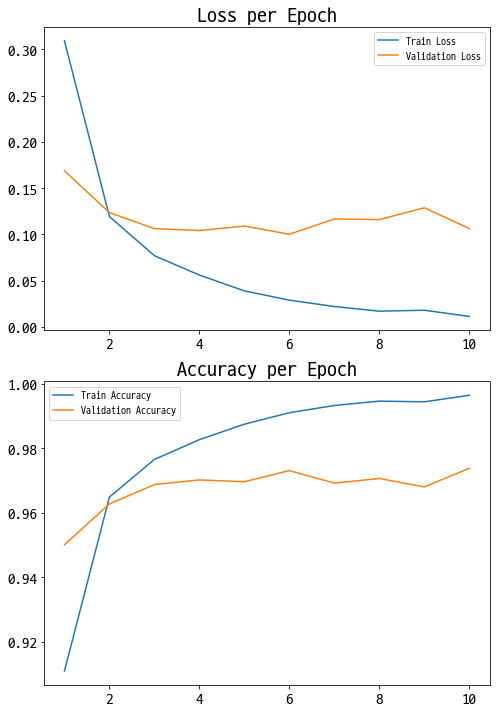

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label="Validation Loss")
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


# loss : 오차 => 작을수록 좋음
# accuracy : 정확도 => 클 수록 좋음

## 테스트셋 평가 -> 최종평가
model.evaluate(X, y)

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9763


In [21]:
print(test_loss, test_acc)

0.0946049690246582 0.9763000011444092


## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제인 경우 predict() 결과에서 class label 출력하기 => 모델 출력값을 후처리하여 최종 예측 label 확인   
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [22]:
# x_test의 처음 5개 데이터를 이용하여 추론
# X-test는 test image를 전처리한 데이터셋(uint8 -> float32 변환/ 0 ~ 1 사이로 정규화)
new_image = X_test[:5]
new_image.shape

(5, 28, 28)

In [23]:
# predict(예측학 데이터의 Feature) -> (데이터 개수, Feature shape)
result = model.predict(new_image)
result.shape

1/1 [==============================] - 0s 64ms/step


(5, 10)

In [24]:
result[0] # 0번 데이터에 대한 예측결과(10, ) : 0 ~ 9일 각각의 확률

array([3.42082696e-10, 1.06502519e-07, 1.87024551e-09, 4.62471689e-06,
       9.98489960e-14, 2.14486748e-10, 1.11611004e-13, 9.99994636e-01,
       2.98784553e-09, 5.59667910e-07], dtype=float32)

In [25]:
# label 확인 (가장 높은 확률이 있는 index)
result_label = np.argmax(result, axis=-1)

In [26]:
result_label

array([7, 2, 1, 0, 4], dtype=int64)

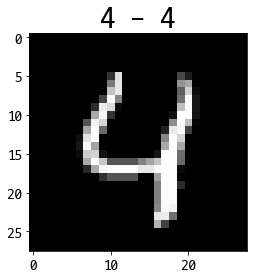

In [27]:
idx = 4

plt.imshow(test_image[idx], cmap='gray')
plt.title(f'{test_label[idx]} - {result_label[idx]}')

plt.show()